# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

# Dataframe

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tesi/Agrimonia_scaled_Bertonico.csv")
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [6]:
df.dropna(inplace=True)
df

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,6204,0.055556,0.079344,0.165180,0.162747,0.236213,0.154064,0.233120,0.342432,0.166667,0.383430,0.012140,0.884630,0.937272,0.991311,0.169876,0.233792,0.103414,0.048313,0.016171,0.032644,0.358312,0.032485,0.212990,0.492368,0.887490,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1821,6205,0.069444,0.066230,0.077282,0.125915,0.187578,0.115605,0.130552,0.000841,0.000000,0.556840,0.216996,0.529030,0.735466,0.859625,0.125796,0.179624,0.112693,0.007291,0.014155,0.027715,0.351300,0.028003,0.220597,0.494498,0.882519,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,6206,0.180556,0.167869,0.139331,0.229555,0.104617,0.116420,0.181653,0.010648,0.000000,0.383430,0.213732,0.492071,0.648345,0.859432,0.192053,0.242633,0.104521,0.027721,0.012056,0.022862,0.344062,0.023307,0.228204,0.496273,0.877713,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,6209,0.416667,0.104918,0.407006,0.623547,0.079270,0.258197,0.166493,0.006207,0.166667,0.300578,0.055368,0.930703,0.919531,0.913304,0.191597,0.17141

In [10]:
# Define the features (independent variables) and the target (dependent variable)
X = df.drop(columns=['AQ_pm10'])  # Features (excluding AQ_pm10)
y = df['AQ_pm10']


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Create a Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression with a single output node
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_valid, y_valid))

# Calculate metrics for the training set
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate metrics for the validation set
y_valid_pred = model.predict(X_valid)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
rmse_valid = mean_squared_error(y_valid, y_valid_pred, squared=False)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

# Calculate metrics for the test set
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the metrics for all three sets
print("Training Set Metrics:")
print(f"MAE: {round(mae_train, 2)}")
print(f"R-squared (R2): {round(r2_train, 2)}")
print(f"RMSE: {round(rmse_train, 2)}")
print("\nValidation Set Metrics:")
print(f"MAE: {round(mae_valid, 2)}")
print(f"R-squared (R2): {round(r2_valid, 2)}")
print(f"RMSE: {round(rmse_valid, 2)}")
print(f"MSE: {round(mse_valid, 2)}")
print("\nTest Set Metrics:")
print(f"MAE: {round(mae_test, 2)}")
print(f"R-squared (R2): {round(r2_test, 2)}")
print(f"RMSE: {round(rmse_test, 2)}")
print(f"MSE: {round(mse_test, 2)}")


Epoch 1/400
34/34 [==============================] - 2s 14ms/step - loss: 10930.7295 - val_loss: 2103.4622
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 249.1799 - val_loss: 15.6592
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 6.1444 - val_loss: 1.7992
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 0.3321 - val_loss: 0.0815
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0767 - val_loss: 0.0806
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0735 - val_loss: 0.0758
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0732 - val_loss: 0.0793
Epoch 8/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0743 - val_loss: 0.0772
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0723 - val_loss: 0.0889
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 0.0723 - val_loss: 0.074

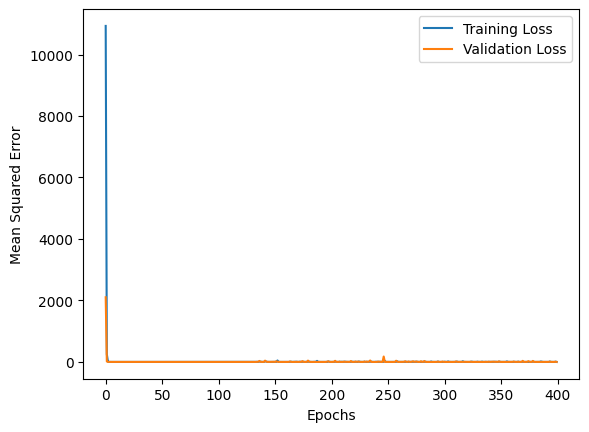

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()